In [1]:
%load_ext autoreload
%autoreload 2

import scipy.stats as ss
import numpy as np
import matplotlib.pyplot as plt
from src.classes import *
import time

import seaborn as sns
sns.set(style="whitegrid", palette="deep", color_codes=True)

# Colors
Scol = "#07D5E6"
Ecol = "#FFD700"
Icol = "#FB9214"
Rcol = "#3B7548"
Dcol = "#EA1313"
Ccol = "#123456"

## Pneumonic plague in Madagascar

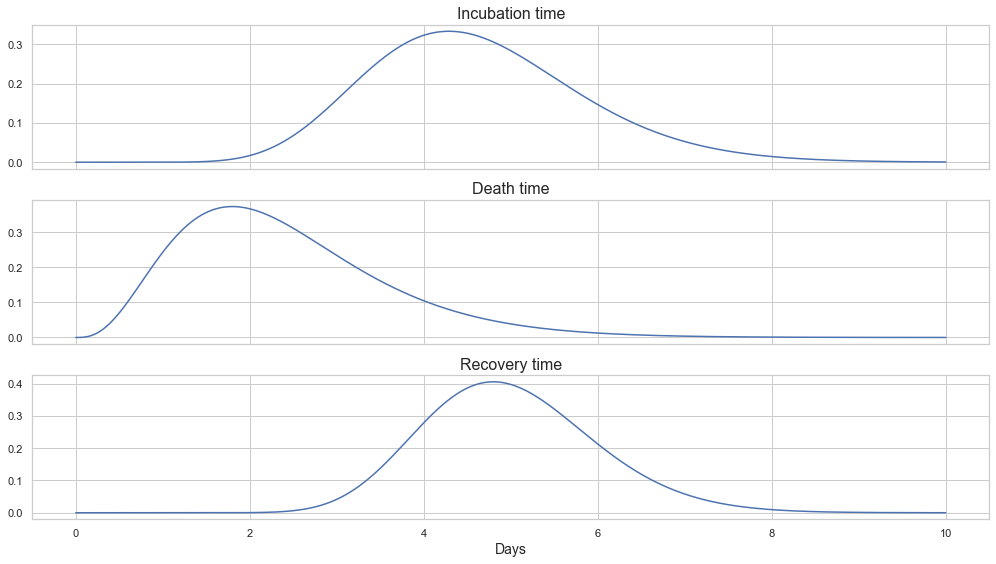

In [8]:
recovery_process = ss.erlang(25, scale=0.2 )
death_process = ss.erlang(4, scale=0.6)
incubation_process = ss.erlang(14, scale=0.33)
x = np.linspace(0,10,10000)
fig, __ = plt.subplots(nrows=3, sharex=True,figsize=(14,8))

fig.axes[0].plot(x, incubation_process.pdf(x))
fig.axes[0].set_title('Incubation time',fontsize = 16)
fig.axes[1].plot(x, death_process.pdf(x))
fig.axes[1].set_title('Death time',fontsize = 16)
fig.axes[2].plot(x, recovery_process.pdf(x))
fig.axes[2].set_title('Recovery time',fontsize = 16)
fig.axes[2].set_xlabel('Days',fontsize = 14)

plt.tight_layout()
plt.savefig('../reports/figures/plague_times.pdf')
plt.show()

Started Aug. 23, was detected on Sept. 11. Simulating 1000 outcomes

In [3]:
np.random.seed(1)

res = list()

for i in range(1_000):
    plague_model = Plague_SEIRD(
        1.45,
        incubation_process,
        recovery_process,
        death_process,
        init_exposed=1,
        population=26_262_313,
        beta_change=20,
        new_beta=0.195,
        prob_dead=0.1
    )
    history = [(time, S, E, I, R, D, C) for __, time, (S, E, I, R, D, C) in plague_model.run_until(1000) ]
    res.append(history)

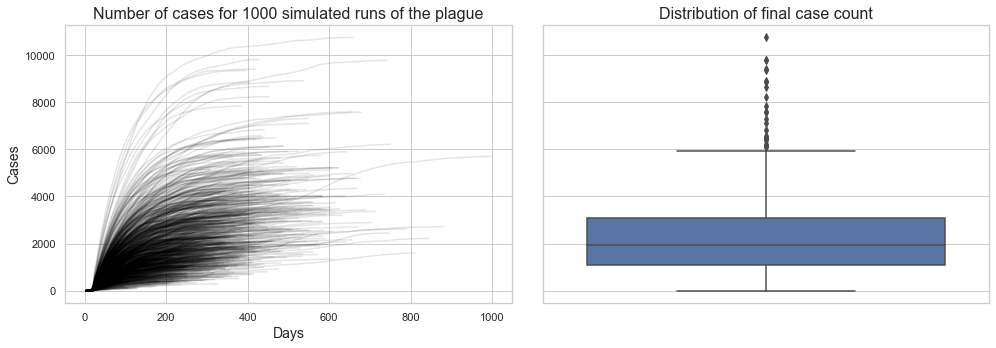

In [15]:
fig, __ = plt.subplots(ncols=2, sharey=True,figsize=(14,5))
plt.sca(fig.axes[0])
for i in range(1000):
    time, S, E, I, R, D, C = zip(*res[i])
    plt.plot(time, C, color='black', alpha=0.1)
plt.ylabel('Cases',fontsize = 14)
plt.xlabel('Days',fontsize = 14)
plt.title('Number of cases for 1000 simulated runs of the plague', fontsize = 16)

cases = [s[-1][6] for s in res];
sns.boxplot(y=cases, ax=fig.axes[1])
fig.axes[1].set_title('Distribution of final case count', fontsize = 16)
plt.tight_layout()
plt.savefig('../reports/figures/plague_case_count.png', dpi=200)
plt.show()

In [9]:
np.mean(cases), np.quantile(cases, [0.025, 0.975])

(2271.139, array([ 160.95, 5922.9 ]))

In [11]:
deaths = [s[-1][5] for s in res]; deaths
np.mean(deaths), np.quantile(deaths, [0.025, 0.975])

(226.895, array([ 15.95, 598.1 ]))